In [1]:
import healpy as hp 
import sys
import os
import numpy as np
sys.path.append('../')
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
from taunet.ncm import NoiseModel
from taunet.simulation import CMBspectra

In [74]:
class NoiseModelGaussian:

    def __init__(self,nside,nlevt,nlevp):
        self.nside = nside
        self.nlevt = nlevt
        self.nlevp = nlevp
        self.npix = hp.nside2npix(self.nside)
    
    def ncm(self,unit='uK'):
        ncm = np.eye(3*self.npix)
        if unit == 'uK':
            fac = 1.
        elif unit == 'K':
            fac = 1e-12
        else:
            raise ValueError('unit not recognized')
        
        pix_amin2 = 4. * np.pi / float(hp.nside2npix(self.nside)) * (180. * 60. / np.pi) ** 2
        sigma_t = np.sqrt(self.nlevt ** 2 / pix_amin2)
        sigma_p = np.sqrt(self.nlevp ** 2 / pix_amin2)
        ncm[:self.npix,:self.npix] *= (sigma_t** 2)
        ncm[self.npix:,self.npix:] *= (sigma_p** 2)
        return ncm * fac
    
    def noisemaps(self,unit='uK'):
        ncm = self.ncm(unit)
        cho = np.linalg.cholesky(ncm)
        noisemaps = np.dot(cho,np.random.normal(0.,1.,cho.shape[0]))
        return noisemaps[:self.npix],noisemaps[self.npix:2*self.npix],noisemaps[2*self.npix:]


In [75]:
cmb = CMBspectra()

In [77]:
nm = NoiseModelGaussian(16,60,55)

In [82]:
T,Q,U, = nm.noisemaps('K')

In [83]:
clt = hp.anafast(T)

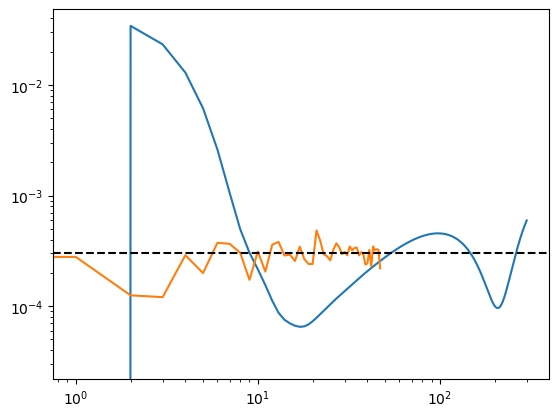

In [84]:
plt.loglog(cmb.EE,label='EE')
plt.loglog(clt*1e12,label='TT')
plt.axhline(np.radians(60./60.)**2,color='k',ls='--')

In [85]:
600 - 463

137